In [1]:
from sklearn import datasets, ensemble, model_selection

boston = datasets.load_boston()
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    boston.data, boston.target)

regressor = ensemble.RandomForestRegressor()
regressor.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [12]:
y_test

array([19.1, 15.1, 23.7, 15.3, 23.7, 32. , 34.7, 19.1, 19.8, 23.8, 15.6,
       27.5, 16.5,  5.6, 24.4, 29.1, 10.4, 24.1, 22. , 19.2, 22.5, 20.1,
       20.8, 21.7, 13.1, 14.5, 24.4, 19.8, 20.6, 29.9, 21.9, 22.1, 17.4,
        7. , 21.7, 18.1, 24.2, 16.4, 17.4, 21.7, 24. , 23.9, 14.1, 19.5,
       33.1, 14.1, 19.4, 19.9, 20.3, 19.4, 24.3, 10.5, 19.1, 12.8, 24.5,
       19.4, 22.9, 33.2, 20. , 36.5, 21.7,  7.5, 21.8, 23.9, 24.1, 23.7,
       17.2, 28.1, 19.4, 16.6, 20. , 20.9, 22. , 28.2, 50. , 17.5, 27.9,
       18.4, 21. , 35.4, 33.1, 19.6, 29.8, 31.7, 20.6, 19.6, 22. , 20.6,
       19.3, 22.8, 15.6, 22.8, 35.4, 35.1, 28.4, 11.3, 22.7, 27.1, 12.1,
       23.1, 23.3, 11.7, 22.6, 10.9, 38.7, 16.7, 25.1, 36.2,  7.2, 23.4,
       28.7, 33.4, 29.1, 12.5, 13. , 46. , 23. , 32.2, 14.1, 24.4, 41.7,
       21.8, 22.4, 19.9, 24.5, 19.6, 19.7])

In [5]:
import numpy as np
categorical_features = [i for i, col in enumerate(boston.data.T)
                        if np.unique(col).size < 10]

In [14]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [15]:
X_test[1]

array([  6.96215,   0.     ,  18.1    ,   0.     ,   0.7    ,   5.713  ,
        97.     ,   1.9265 ,  24.     , 666.     ,  20.2    , 394.43   ,
        17.11   ])

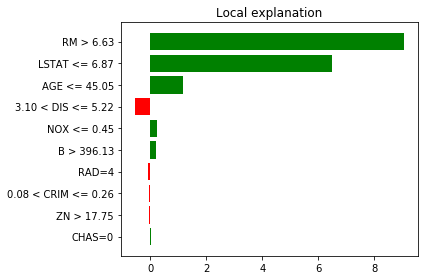

In [16]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_train,
    feature_names=boston.feature_names,
    class_names=['price'],
    categorical_features=categorical_features,
    mode='regression')

# Now explain a prediction
exp = explainer.explain_instance(X_test[5], regressor.predict,
        num_features=10)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()